In [1]:
print('oi')

oi


# Experimento 11 - LSTM

## Dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\mathe\Documents\Experimentos Anteprojeto\0 - EXPERIMENTOS~~\Nova base de dados\Dataset4.csv")
df

,Unnamed: 0,Indivíduo,Classe,Classe Numero,Anomalia,grupo,grupo_numero,BPM
0,0,MUSE_20180111_155115_19000,ST,4,0,GSVT,4,[131.23061796 126.66537003 123.73989647 123.37...
1,1,MUSE_20180111_155154_74000,AFIB,3,0,AFIB,3,[114.03818953 102.95237937 91.09640747 113.73...
2,2,MUSE_20180111_155203_15000,AFIB,3,0,AFIB,3,[66.81256097 75.43377035 79.5676889 71.691356...
3,3,MUSE_20180111_155249_70000,ST,4,0,GSVT,4,[117.21932233 117.21932233 117.06370937 118.42...
4,4,MUSE_20180111_155542_84000,AF,5,0,AFIB,3,[ 85.7693227 80.3772154 93.77895042 94.63...
...,...,...,...,...,...,...,...,...
10641,10641,MUSE_20181222_204306_99000,SVT,7,0,GSVT,4,[195.65960355 196.08401574 196.93842449 164.04...
10642,10642,MUSE_20181222_204309_22000,SVT,7,0,GSVT,4,[163.68872693 163.38516309 162.19059836 163.34...
10643,10643,MUSE_20181222_204310_31000,SVT,7,0,GSVT,4,[152.81535885 152.03835807 152.03835807 152.54...
10644,10644,MUSE_20181222_204312_58000,SVT,7,0,GSVT,4,[177.18715393 174.80620155 174.45398966 174.45...


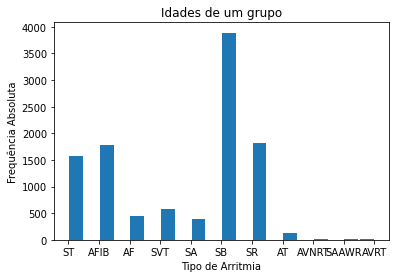

In [4]:
import matplotlib.pyplot as plt
ritmo=df['Classe']
plt.title('Idades de um grupo')
plt.xlabel('Tipo de Arritmia')
plt.ylabel('Frequência Absoluta')
plt.hist(ritmo, 20, rwidth=0.9)
plt.show()

## 11.1 Detecção de arritimia

In [5]:
X = df['BPM'][0]
X

'[131.23061796 126.66537003 123.73989647 123.37773509 125.01750946\n 126.43023814 126.79239952 128.57353375 128.75694595 124.63194182\n 123.72258637 123.90757971 130.34258615 130.70168481 125.33408559\n 121.78281648 120.72340092 125.9060068  127.3306858 ]'

In [6]:
import numpy as np

X = df['BPM'][6]
X = X.replace('[','')
X = X.replace(']','')
X = X.split()
X = list(np.float_(X))

X

[]

In [7]:
lista_X = df['BPM']
X = []
i = 0

for v in lista_X:
    a = df['BPM'][i]
    a = a.replace('[','')
    a = a.replace(']','')
    a = a.split()
    a = list(np.float_(a))
    print(a)
    X.append(a)
    i += 1

[131.23061796, 126.66537003, 123.73989647, 123.37773509, 125.01750946, 126.43023814, 126.79239952, 128.57353375, 128.75694595, 124.63194182, 123.72258637, 123.90757971, 130.34258615, 130.70168481, 125.33408559, 121.78281648, 120.72340092, 125.9060068, 127.3306858]
[114.03818953, 102.95237937, 91.09640747, 113.73729715, 119.86278986, 116.92665088, 103.89754712, 102.09379532, 110.12183693, 110.47979798, 109.63804714, 105.42929293, 113.997114, 125.74056476, 132.39311174, 129.4256491]
[66.81256097, 75.43377035, 79.5676889, 71.69135637, 56.49653411, 48.11067098, 44.77937202, 58.6673891, 70.23373788]
[117.21932233, 117.21932233, 117.06370937, 118.42146214, 116.91858413, 116.91858413, 116.76297117, 118.11023622, 117.80265748, 116.45539243, 116.30099996, 116.76419166, 118.11145671, 117.95827044, 116.45539243, 116.30099996, 116.76419166, 118.26706967]
[85.7693227, 80.3772154, 93.77895042, 94.63967505, 100.13353038, 80.99432218, 79.98836692, 84.80419102, 106.31357806, 117.60634486, 104.31581738,

In [8]:
X

[[131.23061796,
  126.66537003,
  123.73989647,
  123.37773509,
  125.01750946,
  126.43023814,
  126.79239952,
  128.57353375,
  128.75694595,
  124.63194182,
  123.72258637,
  123.90757971,
  130.34258615,
  130.70168481,
  125.33408559,
  121.78281648,
  120.72340092,
  125.9060068,
  127.3306858],
 [114.03818953,
  102.95237937,
  91.09640747,
  113.73729715,
  119.86278986,
  116.92665088,
  103.89754712,
  102.09379532,
  110.12183693,
  110.47979798,
  109.63804714,
  105.42929293,
  113.997114,
  125.74056476,
  132.39311174,
  129.4256491],
 [66.81256097,
  75.43377035,
  79.5676889,
  71.69135637,
  56.49653411,
  48.11067098,
  44.77937202,
  58.6673891,
  70.23373788],
 [117.21932233,
  117.21932233,
  117.06370937,
  118.42146214,
  116.91858413,
  116.91858413,
  116.76297117,
  118.11023622,
  117.80265748,
  116.45539243,
  116.30099996,
  116.76419166,
  118.11145671,
  117.95827044,
  116.45539243,
  116.30099996,
  116.76419166,
  118.26706967],
 [85.7693227,
  80.37

In [9]:
y = df['Classe Numero']
y

0        4
1        3
2        3
3        4
4        5
        ..
10641    7
10642    7
10643    7
10644    7
10645    7
Name: Classe Numero, Length: 10646, dtype: int64

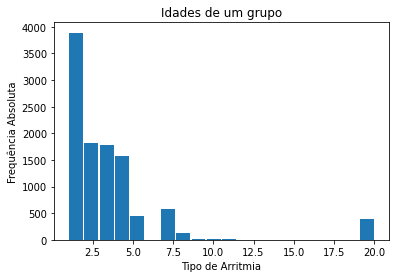

In [10]:
import matplotlib.pyplot as plt
ritmo=y
plt.title('Idades de um grupo')
plt.xlabel('Tipo de Arritmia')
plt.ylabel('Frequência Absoluta')
plt.hist(ritmo, 20, rwidth=0.9)
plt.show()

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

C:\Users\mathe\AppData\Local\Temp/ipykernel_15044/2127771706.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.asarray(X_train)
C:\Users\mathe\AppData\Local\Temp/ipykernel_15044/2127771706.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.asarray(X_test)


In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

In [15]:
X_train1 = X_train
X_test1 = X_test

In [16]:
X_train[6][0]

59.3754126

In [17]:
# truncate and pad input sequences
max_review_length = 16

X_train = sequence.pad_sequences(X_train1, maxlen=max_review_length,value= 0, padding='pre', truncating="pre")
X_test = sequence.pad_sequences(X_test1, maxlen=max_review_length,value= 0, padding='pre', truncating="pre")

In [18]:
X_train[5]

array([ 0,  0,  0,  0,  0,  0,  0,  0, 59, 58, 57, 57, 57, 57, 57, 57])

In [19]:
j = 0
for u in list(X_train[j]):
    i = 0
    for v in list(X_train[j]):
        if v == 0:
            X_train[j][i] = X_train1[j][0]
            i += 1
    j +=1
    
X_train[5]

array([59, 59, 59, 59, 59, 59, 59, 59, 59, 58, 57, 57, 57, 57, 57, 57])

In [20]:
# create the model
top_words = 300 
embedding_vecor_length = 5
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 5)             1500      
                                                                 
 lstm (LSTM)                 (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 1,726
Trainable params: 1,726
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
7132/7132 [==============================] - 72s 10ms/step - loss: -31.2654 - accuracy: 0.3660 - val_loss: -56.1802 - val_accuracy: 0.3640
Epoch 2/20
7132/7132 [==============================] - 79s 11ms/step - loss: -82.5391 - accuracy: 0.3660 - val_loss: -105.2806 - val_accuracy: 0.3640
Epoch 3/20
7

In [21]:

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 36.40%
